In [35]:
import numpy as np
import matplotlib.pyplot as plt

def bandit_init(k):
    # set the mean for each bandit
    means=np.random.normal(0,10,k)
    standards=np.random.uniform(5, 15, k)  
    return means, standards

# get the reward of pull th i_th bandit
def get_reward(i, means, standards):
    mean=means[i]
    standard=standards[i]
    return np.random.normal(mean,standard)

n_arms = 10
n_plays = 2000
mean = 0.5
str_dev = 0.1
arms = np.random.normal(mean, str_dev, size=n_arms)

class ThompsonSamplingBandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.alpha = np.ones(n_arms)  # Success count for each arm
        self.beta = np.ones(n_arms)   # Failure count for each arm
        self.choices = []
        self.rewards = np.zeros((n_arms, 0))

    def select_arm(self):
        sampled_theta = [np.random.beta(a, b) for a, b in zip(self.alpha, self.beta)]
        return np.argmax(sampled_theta)

    def update(self, chosen_arm, reward):
        if reward == 1:
            self.alpha[chosen_arm] += 1
        else:
            self.beta[chosen_arm] += 1
         # Track chosen arm and reward
        self.choices.append(chosen_arm)
        reward_update = np.zeros(self.n_arms)
        reward_update[chosen_arm] = reward
        self.rewards = np.hstack([self.rewards, reward_update.reshape(-1, 1)])

# Initialize bandit
bandit = ThompsonSamplingBandit(n_arms=n_arms)
rewards = []
# Simulate the multi-armed bandit process
for _ in range(n_plays):
    chosen_arm = bandit.select_arm()
    reward = np.random.binomial(1, arms[chosen_arm])
    bandit.update(chosen_arm, reward)
    rewards.append(reward)

# Analysis of results
print(f"Total Reward: {sum(rewards)}")

Total Reward: 1301


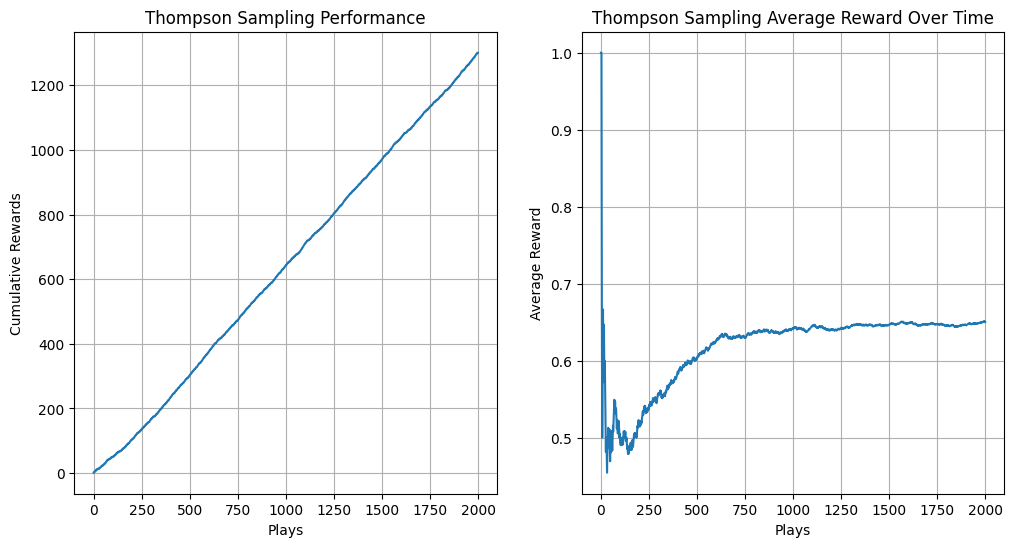

In [36]:
# Plotting the cumulative rewards over time
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / np.arange(1, n_plays + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards)
plt.xlabel('Plays')
plt.ylabel('Cumulative Rewards')
plt.title('Thompson Sampling Performance')
plt.grid(True)

plt.subplot(1, 2, 2)

# Plotting the average rewards over time
plt.plot(average_rewards)
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.title('Thompson Sampling Average Reward Over Time')
plt.grid(True)

plt.show()

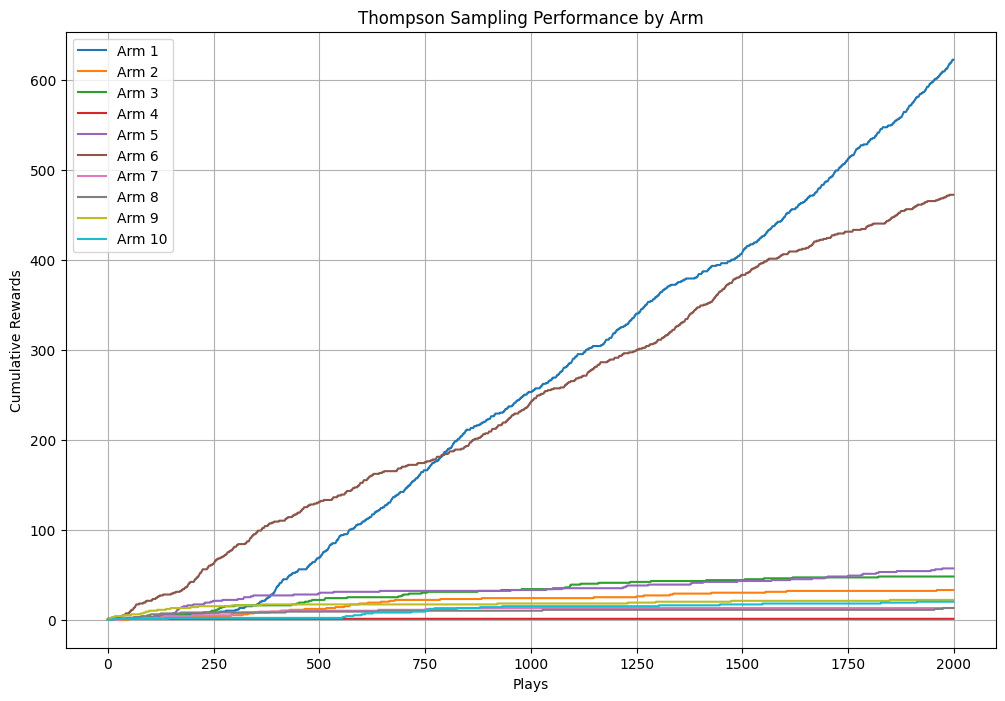

In [37]:
# Plotting the cumulative rewards for each arm
plt.figure(figsize=(12, 8))
for arm in range(n_arms):
    cumulative_rewards_arm = np.cumsum(bandit.rewards[arm, :])
    plt.plot(cumulative_rewards_arm, label=f'Arm {arm + 1}')

plt.xlabel('Plays')
plt.ylabel('Cumulative Rewards')
plt.title('Thompson Sampling Performance by Arm')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Count of selections for each arm
        self.values = np.zeros(n_arms)  # Estimated value for each arm
        self.total_reward = 0
        self.average_rewards = []

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random arm
            return np.random.randint(0, self.n_arms)
        else:
            # Exploitation: choose the best arm
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        # Update the counts and values
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value

        # Update total reward and compute average
        self.total_reward += reward
        self.average_rewards.append(self.total_reward / (len(self.average_rewards) + 1))


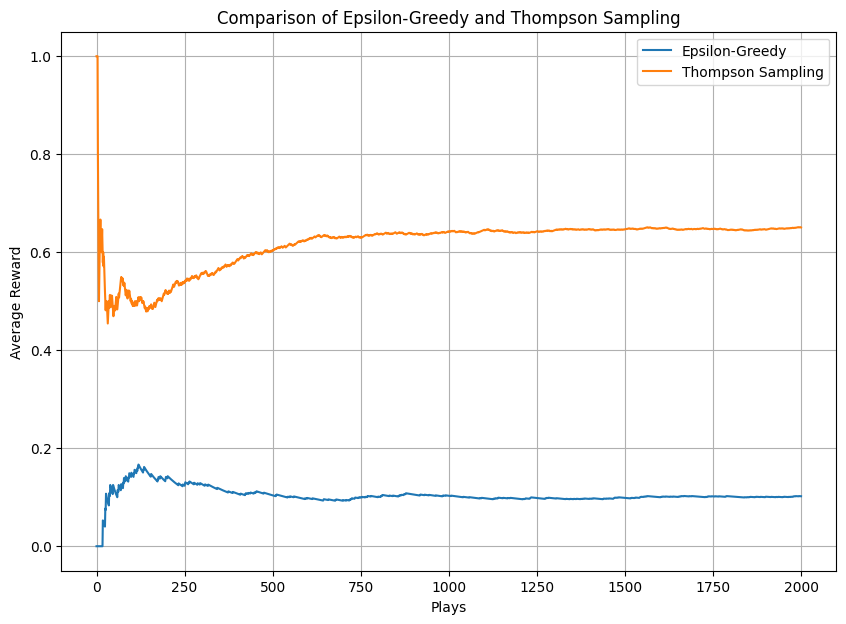

In [39]:
# Simulation parameters
n_arms = 5
n_plays = 2000

# Initialize bandits
epsilon_greedy_bandit = EpsilonGreedyBandit(n_arms=n_arms, epsilon=0.1)
thompson_sampling_bandit = ThompsonSamplingBandit(n_arms=n_arms)

# Run simulations
for play in range(n_plays):
    # Epsilon-Greedy
    chosen_arm_eg = epsilon_greedy_bandit.select_arm()
    reward_eg = np.random.rand() < 0.1  # Example reward function; replace with your own
    epsilon_greedy_bandit.update(chosen_arm_eg, reward_eg)

    # Thompson Sampling
    chosen_arm_ts = thompson_sampling_bandit.select_arm()
    reward_ts = np.random.rand() < 0.1  # Example reward function; replace with your own
    thompson_sampling_bandit.update(chosen_arm_ts, reward_ts)

# Plotting the average rewards over time
plt.figure(figsize=(10, 7))
plt.plot(epsilon_greedy_bandit.average_rewards, label='Epsilon-Greedy')
plt.plot(average_rewards, label='Thompson Sampling')
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.title('Comparison of Epsilon-Greedy and Thompson Sampling')
plt.legend()
plt.grid(True)
plt.show()